# Exploración

Importamos librerías necesarias:

In [1]:
#instalamos las librerías necesarias
import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import missingno as msno
from scipy.stats import skew

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, label_binarize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier,  GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
import xgboost as xgb


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold, cross_val_predict, cross_val_score, GridSearchCV, KFold, LeaveOneOut, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow import get_logger
from tensorflow.keras import layers

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Cargo las funciones que voy a utilizar
from FuncionesMineria import *


Funciones útiles:

In [2]:
def plot_confusion_matrix(X, y, gsearch, p, seed):
  print('\n================================================')
  print('MATRIZ DE CONFUSION:')
  print('================================================')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state=seed)

  y_hat_train = gsearch.predict(X_train)
  y_hat_test = gsearch.predict(X_test)

  print('Confusion matrix train:\n', 'Train score: ', round(gsearch.score(X_train, y_train),3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_train, y=y_train)
  plt.show()

  print('\nConfusion matrix test:\n','Test score: ', round(gsearch.score(X_test, y_test), 3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_test, y=y_test)  
  plt.show()

In [3]:
# Load the data
data = pd.read_csv("C:\\Users\\pablo\\OneDrive\\Documentos\\GitHub\\MasterBigDataML-MachineLearningI\\src\\data\\datos_practica_miss.csv")

data = data.sample(n=1000, random_state=4975)
data.head(10)

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
371,371,Male,17.000000,1.620000,69.000000,yes,yes,3.000000,1.000000,Always,no,2.000000,yes,1.000000,2.000000,NaN,NaN,Overweight_Level_I
395,395,Female,20.000000,1.540000,39.000000,yes,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
350,350,Male,17.000000,1.750000,70.000000,yes,no,2.000000,3.000000,Sometimes,no,1.000000,no,3.000000,2.000000,Sometimes,Walking,Normal_Weight
1216,1216,Female,42.316070,1.583943,81.936398,yes,yes,2.490507,2.974204,Sometimes,no,1.846754,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
2025,2025,Female,21.394047,1.792933,137.832414,yes,yes,3.000000,3.000000,Sometimes,no,2.682909,no,1.318743,0.900497,Sometimes,Public_Transportation,Obesity_Type_III
1729,1729,NaN,29.669219,NaN,129.194490,NaN,yes,2.432355,NaN,Sometimes,no,1.336526,NaN,1.638120,NaN,NaN,NaN,NaN
1652,1652,Male,25.058566,1.764484,113.234349,yes,yes,1.517912,3.000000,Sometimes,no,2.038958,no,1.590255,0.001640,Sometimes,Public_Transportation,Obesity_Type_II
2016,2016,Female,25.940153,1.596813,102.320437,yes,yes,3.000000,3.000000,Sometimes,no,1.000536,no,0.005939,0.566353,Sometimes,Public_Transportation,Obesity_Type_III
364,364,Male,24.000000,1.840000,86.000000,yes,yes,2.000000,1.000000,Always,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_I
855,855,Male,21.000000,1.676014,75.000000,yes,yes,2.000000,3.000000,Sometimes,no,1.164062,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I


Vemos los tipos de las variables:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 371 to 1382
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1000 non-null   int64  
 1   Gender                          983 non-null    object 
 2   Age                             977 non-null    float64
 3   Height                          975 non-null    float64
 4   Weight                          977 non-null    float64
 5   family_history_with_overweight  976 non-null    object 
 6   FAVC                            975 non-null    object 
 7   FCVC                            977 non-null    float64
 8   NCP                             973 non-null    float64
 9   CAEC                            975 non-null    object 
 10  SMOKE                           984 non-null    object 
 11  CH2O                            980 non-null    float64
 12  SCC                             981 n

In [5]:
# Obtener los nombres de las columnas del DataFrame
column_names = data.columns.tolist()
column_names

['Unnamed: 0',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

## ATIPICOS

Cuento el porcentaje de atipicos de cada variable. 

In [6]:
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

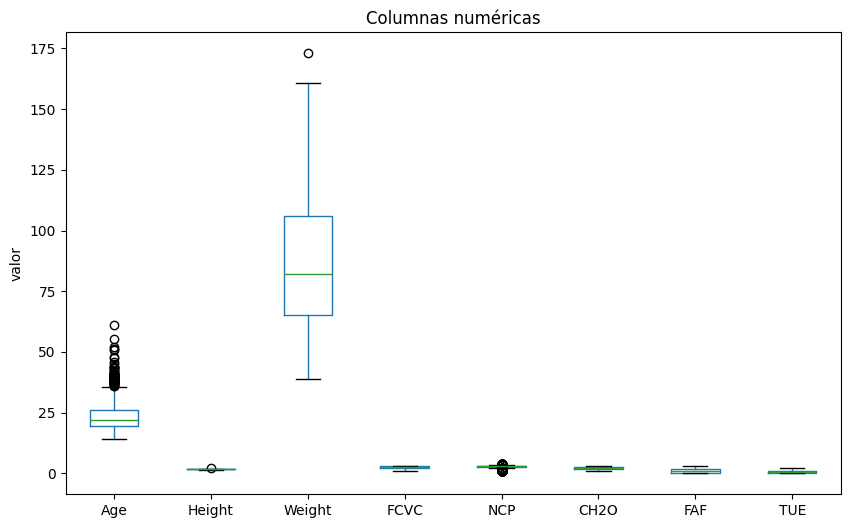

In [7]:
# Creating a boxplot for each numeric column
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.title('Columnas numéricas')
plt.ylabel('valor')
plt.grid(False)
plt.show()

Solo vamos a corregir los valores atípicos de NCP, pues los de *Age*, *Height*, y *Weight* no deben eliminarse:

In [8]:
numerical_column_outliers = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

resultados = {x: atipicosAmissing(data[x])[1] / len(data) for x in numerical_column_outliers}

print(resultados)

{'FCVC': 0.0, 'NCP': 0.0, 'CH2O': 0.0, 'FAF': 0.0, 'TUE': 0.0}


In [9]:
# Modifico los atipicos como missings
for x in numerical_column_outliers:
    data[x] = atipicosAmissing(data[x])[0]

In [10]:
resultados = {x: atipicosAmissing(data[x])[1] / len(data) for x in numerical_column_outliers}

print(resultados)

{'FCVC': 0.0, 'NCP': 0.0, 'CH2O': 0.0, 'FAF': 0.0, 'TUE': 0.0}


## Valores perdidos

Buscamos valores nulos:

In [11]:
#busca nulos
data.isna().sum()

Unnamed: 0                         0
Gender                            17
Age                               23
Height                            25
Weight                            23
family_history_with_overweight    24
FAVC                              25
FCVC                              23
NCP                               27
CAEC                              25
SMOKE                             16
CH2O                              20
SCC                               19
FAF                               27
TUE                               19
CALC                              19
MTRANS                            20
NObeyesdad                        20
dtype: int64

In [12]:
#busca duplicados
print(data.duplicated().sum()) #para ver si hay alguna obs duplicada
print(data.shape) #tamaño (filasxcolumnas) del archivo
data = data.drop_duplicates() #eliminar duplicados (si procede)
print(data.duplicated().sum())
print(data.shape)

0
(1000, 18)
0
(1000, 18)


Usando la librería Missingno visualiazmos grafiacmente los valores perdidos:

<Axes: >

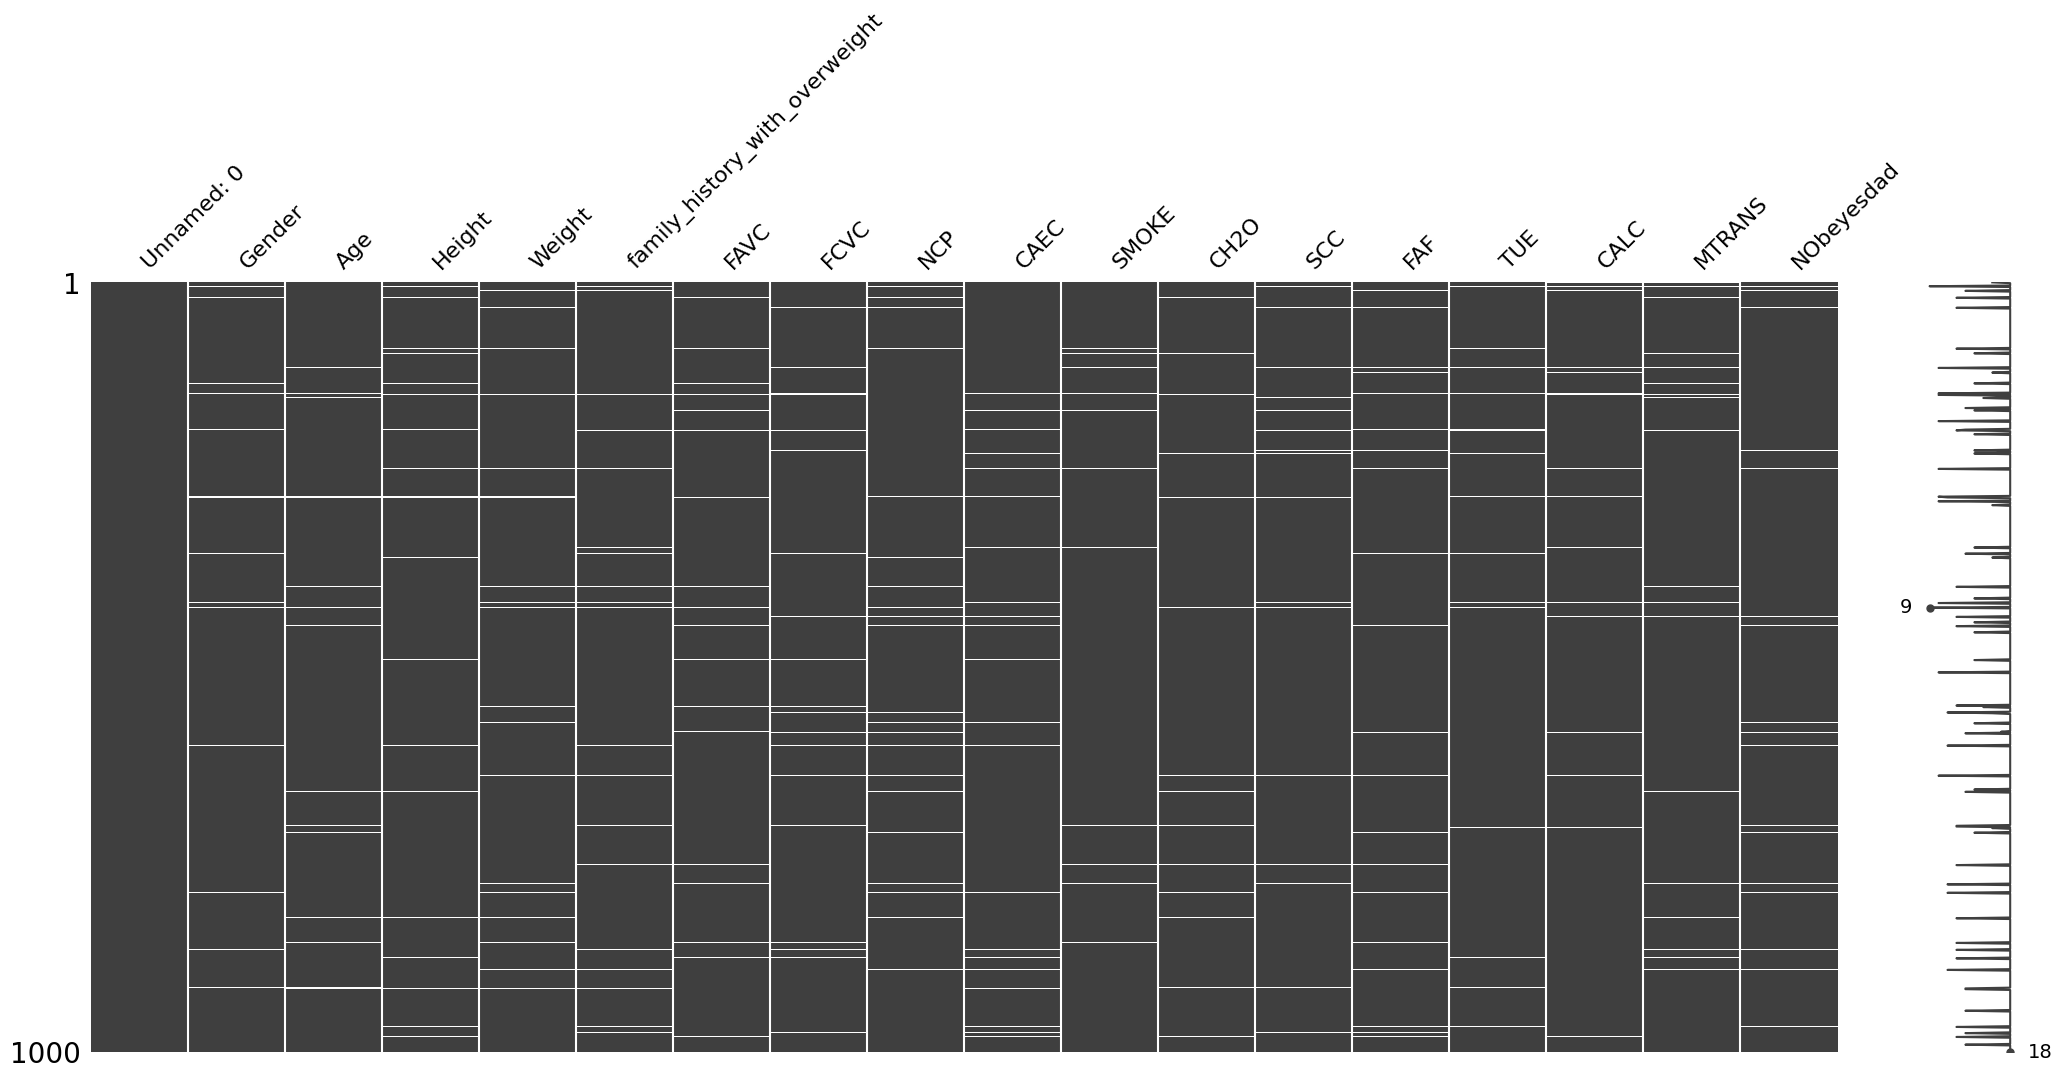

In [13]:
# Visualize the missing data using missingno's matrix visualization
msno.matrix(data)

Vemos que para lidiar con los valores perdidos tendremos que hacer un análisis por variable imputando sus valores perdidos.

En primer lugar eliminamos las filas con valores perdidos en la variable objetivo. Después eliminamos la primera columna pues no parece relevante para el análisis. Después imputamos valores perdidios sustituyendo las numéricas por la media o mediana y las categóricas por la moda: 

In [14]:
# Drop the 'Unnamed: 0' column as it's redundant
data.drop('Unnamed: 0', axis=1, inplace=True)

# Remove rows where the target variable 'NObeyesdad' is missing
data = data.dropna(subset=['NObeyesdad'])


for column in numerical_columns:
    if abs(skew(data[column].dropna())) > 1:
        # If skewed, use median for imputation
        data[column].fillna(data[column].median(), inplace=True)
    else:
        # If not skewed, use mean for imputation
        data[column].fillna(data[column].mean(), inplace=True)


for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check for any remaining missing values
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [15]:
data.shape

(980, 17)

Vamos a sustituir los valores de la variable objetivo en 0 o 1 dependiendo de si es un caso de Obesidad (0), No obesidad (1).

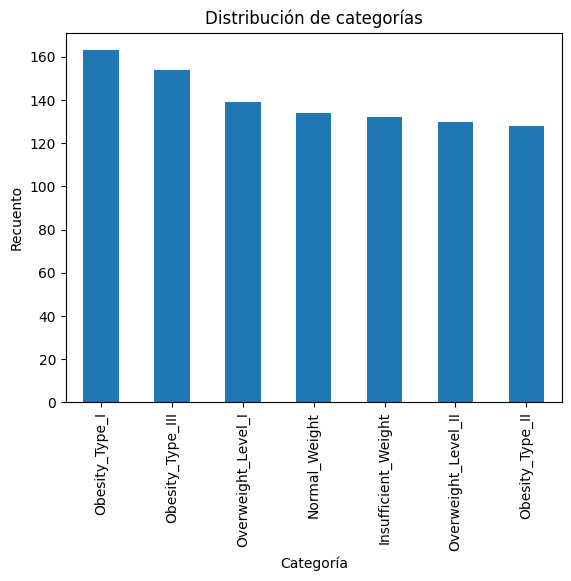

In [16]:
data['NObeyesdad'].value_counts().plot(kind='bar')
plt.title('Distribución de categorías')
plt.xlabel('Categoría')
plt.ylabel('Recuento')
plt.show()

In [17]:
obesity_mapping = {
    'Obesity_Type_I': 1,
    'Obesity_Type_II': 1,
    'Obesity_Type_III': 1,
    'Overweight_Level_I': 0,
    'Overweight_Level_II': 0,
    'Normal_Weight': 0,
    'Insufficient_Weight': 0
}

data['NObeyesdad'] = data['NObeyesdad'].map(obesity_mapping)
data['NObeyesdad'].value_counts()

NObeyesdad
0    535
1    445
Name: count, dtype: int64

In [18]:
correlation = pd.concat([data[numerical_columns], data[['NObeyesdad']]], axis=1)
correlation

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
371,17.000000,1.620000,69.000000,3.000000,1.000000,2.000000,1.000000,2.000000,0
395,20.000000,1.540000,39.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0
350,17.000000,1.750000,70.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0
1216,42.316070,1.583943,81.936398,2.490507,2.974204,1.846754,0.000000,0.000000,1
2025,21.394047,1.792933,137.832414,3.000000,3.000000,2.682909,1.318743,0.900497,1
...,...,...,...,...,...,...,...,...,...
2027,18.206340,1.807406,141.799429,3.000000,3.000000,2.472903,1.998047,0.840911,1
695,19.729250,1.793315,58.195150,2.508835,3.435905,2.076933,2.026668,1.443328,0
835,29.320380,1.642506,69.906708,2.366949,3.000000,1.926577,1.581242,0.000000,0
1766,30.702559,1.861980,126.418413,2.927187,3.000000,1.508796,0.902776,1.015467,1


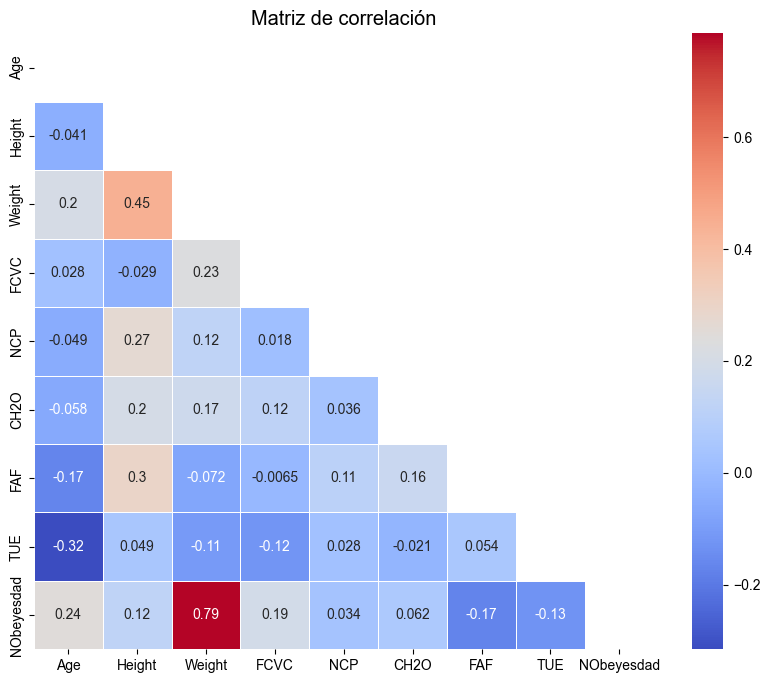

In [19]:
matriz_corr = correlation.corr(method = 'pearson')
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
sns.set(font_scale=1.2)
plt.title("Matriz de correlación")
plt.show()

No hay evidencias para eliminar ninguna variable.

## Regresión Logística

In [20]:
# Transformaciones a las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

#como le voy a aplicar el transformador al pipeline, hay que proporcionarle las variables originales
explicativas = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Definimos el modelo
logistic_regression = LogisticRegression()

# Grid de parámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 1000, 5000, 10000]
}

# particiones en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(explicativas, y, test_size=0.2, random_state=4975, stratify=y)

# Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Definimos el modelo de regresión logística
logistic_regression = LogisticRegression(max_iter=5000)

# Configuramos el selector de características secuenciales para stepwise selection (forward y backward)
sfs = SFS(estimator=logistic_regression, 
          k_features='best', 
          forward=True, 
          floating=True,  # Esto habilita la eliminación hacia atrás en el proceso stepwise
          scoring='accuracy',
          cv=StratifiedKFold(5))

# Obtenemos los nombres de las características después de la transformación
transformed_features = preprocessor.get_feature_names_out()

# Entrenamos el SFS con los datos preprocesados
sfs.fit(X_train_preprocessed, y_train)

# Obtenemos los índices de las características seleccionadas
selected_feature_indices = list(sfs.k_feature_idx_)

# Dado que el array es 1-dimensional, necesitamos usar estos índices para seleccionar los nombres correspondientes
selected_features = [transformed_features[idx] for idx in selected_feature_indices]
print("Features selected by stepwise algorithm:", selected_features)



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: 'NoneType' object is not iterable

In [22]:
# Reducimos los conjuntos de entrenamiento y prueba a las características seleccionadas
X_train_selected = X_train_preprocessed[:, sfs.k_feature_idx_]
X_test_selected = X_test_preprocessed[:, sfs.k_feature_idx_]

# Ahora, podemos realizar la búsqueda en malla (GridSearch) solo con las características seleccionadas
grid_search = GridSearchCV(estimator=logistic_regression, 
                           param_grid=param_grid, 
                           cv=StratifiedKFold(5), 
                           scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

# Mostramos los mejores parámetros encontrados
print("Best parameters from grid search:", grid_search.best_params_)

# Ajustamos el modelo de regresión logística con los mejores parámetros encontrados
best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train_selected, y_train)

# Hacemos predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_estimator.predict(X_test_selected)

# Calculamos la precisión del modelo con las características seleccionadas
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with selected features:", accuracy)

Best parameters from grid search: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of the model with selected features: 0.9795918367346939


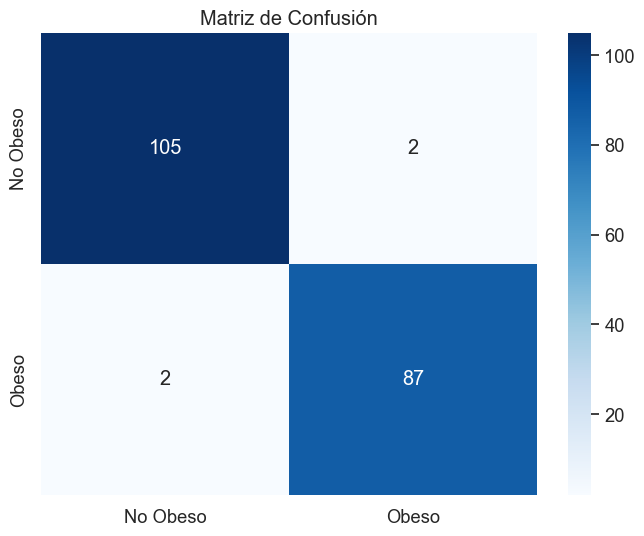

In [23]:

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Obeso', 'Obeso'], yticklabels=['No Obeso', 'Obeso'])
plt.title('Matriz de Confusión')
plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Asumiendo que 'sfs' es tu SequentialFeatureSelector y 'selected_features' los índices de las características seleccionadas
X_train_nn = X_train_preprocessed[:, sfs.k_feature_idx_]
X_test_nn = X_test_preprocessed[:, sfs.k_feature_idx_]

# Definir una gama de posibles arquitecturas y parámetros para la red neuronal
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Crear el modelo de red neuronal con GridSearchCV
nn_model = MLPClassifier(max_iter=1000, random_state=4975)
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='accuracy')

# Entrenar la red neuronal con GridSearchCV para encontrar los mejores parámetros
grid_search_nn.fit(X_train_nn, y_train)

# Obtener el mejor modelo de red neuronal
best_nn_model = grid_search_nn.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred_nn = best_nn_model.predict(X_test_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Precisión de la mejor red neuronal:", accuracy_nn)

# Justificar los parámetros seleccionados
print("Mejores parámetros para la red neuronal:", grid_search_nn.best_params_)


Precisión de la mejor red neuronal: 0.9693877551020408
Mejores parámetros para la red neuronal: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


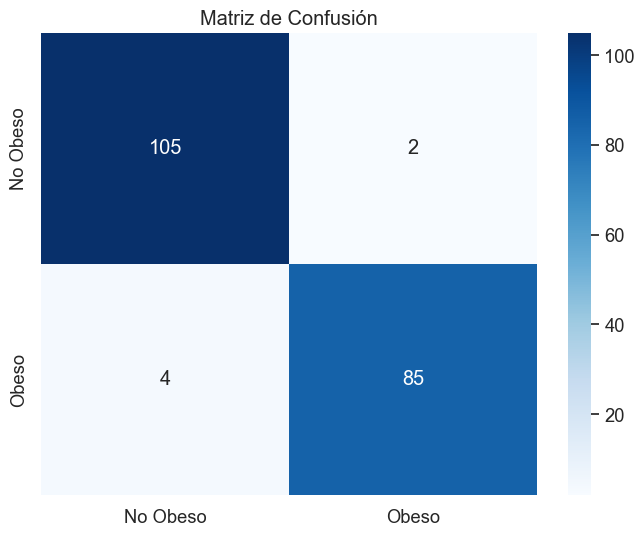

In [25]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_nn)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Obeso', 'Obeso'], yticklabels=['No Obeso', 'Obeso'])
plt.title('Matriz de Confusión')
plt.show()

## Select K Best

Vamos ha realizar feature selection con el algoritmo K Best.

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.pipeline import Pipeline

# Definir el selector de características
selector = SelectKBest(f_classif, k=4)

# Definir la red neuronal y el espacio de parámetros para el grid search
mlp = MLPClassifier(max_iter=1000)
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (50,), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
}

# Definir el pipeline completo, incluyendo el selector y la red neuronal
pipeline = Pipeline([
    ('selector', selector),
    ('mlp', mlp)
])

# Definir el scorer AUC para usar en el grid search
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

# Realizar el grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=auc_scorer)
grid_search.fit(X_train_preprocessed, y_train)

# Obtener las características seleccionadas
selected_features = grid_search.best_estimator_.named_steps['selector'].get_support(indices=True)
# Obtener nombres de características después de la transformación (incluyendo OneHotEncoded si es necesario)
transformed_feature_names = preprocessor.get_feature_names_out()

# Usar esos nombres para indexar las características seleccionadas
selected_feature_names = transformed_feature_names[selected_features]

print(f"Las 4 mejores características son: {list(selected_feature_names)}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_proba = grid_search.predict_proba(X_test_preprocessed)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"El AUC en el conjunto de prueba es: {test_auc}")

# Mostrar los mejores parámetros encontrados
print(f"Los mejores parámetros son: {grid_search.best_params_}")


Las 4 mejores características son: ['num__Weight', 'cat__family_history_with_overweight_no', 'cat__family_history_with_overweight_yes', 'cat__CAEC_Sometimes']
El AUC en el conjunto de prueba es: 0.9615667331723196
Los mejores parámetros son: {'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (10,), 'mlp__learning_rate_init': 0.01, 'mlp__solver': 'adam'}


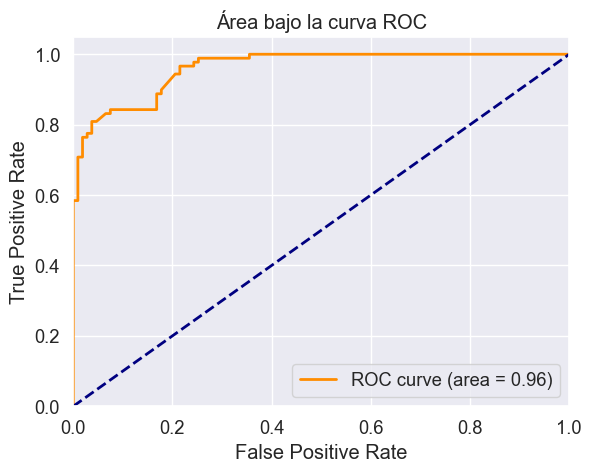

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular tasas de verdaderos y falsos positivos y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Crear gráfico de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Área bajo la curva ROC')
plt.legend(loc="lower right")
plt.show()

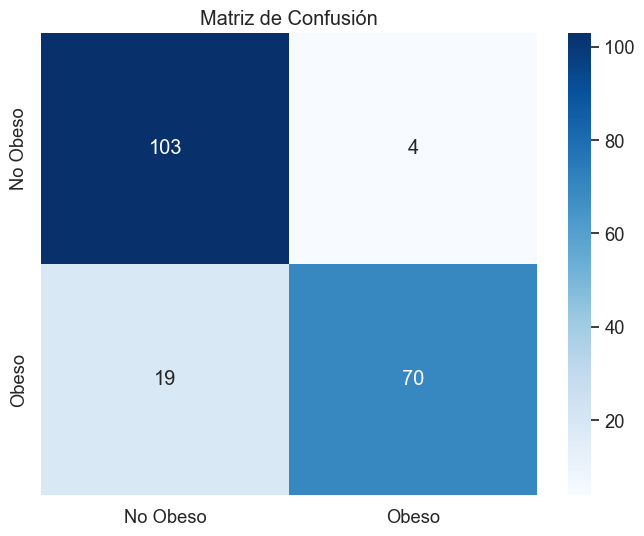

In [28]:
y_pred = grid_search.predict(X_test_preprocessed)

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Obeso', 'Obeso'], yticklabels=['No Obeso', 'Obeso'])
plt.title('Matriz de Confusión')
plt.show()

In [29]:
# Evaluar el Mejor Modelo de Red Neuronal tras la Regresión Logística (Apartado 1)
y_pred_nn_1 = best_nn_model.predict(X_test_nn)
accuracy_nn_1 = accuracy_score(y_test, y_pred_nn_1)
y_pred_proba_nn_1 = best_nn_model.predict_proba(X_test_nn)[:, 1]
auc_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1)

# Evaluar el Mejor Modelo de Red Neuronal tras SelectKBest (Apartado 2)
y_pred_nn_2 = grid_search.predict(X_test_preprocessed)
accuracy_nn_2 = accuracy_score(y_test, y_pred_nn_2)
y_pred_proba_nn_2 = grid_search.predict_proba(X_test_preprocessed)[:, 1]
auc_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2)

# Imprimir resultados para comparar
print(f"Modelo del Apartado 1: Precisión = {accuracy_nn_1}, AUC = {auc_nn_1}")
print(f"Modelo del Apartado 2: Precisión = {accuracy_nn_2}, AUC = {auc_nn_2}")

# Decisión sobre el mejor modelo
if auc_nn_1 > auc_nn_2:
    print("El modelo del Apartado 1 es superior en términos de AUC.")
elif auc_nn_1 < auc_nn_2:
    print("El modelo del Apartado 2 es superior en términos de AUC.")
else:
    print("Ambos modelos tienen un rendimiento similar en términos de AUC.")

Modelo del Apartado 1: Precisión = 0.9693877551020408, AUC = 0.9936994644544787
Modelo del Apartado 2: Precisión = 0.8826530612244898, AUC = 0.9615667331723196
El modelo del Apartado 1 es superior en términos de AUC.


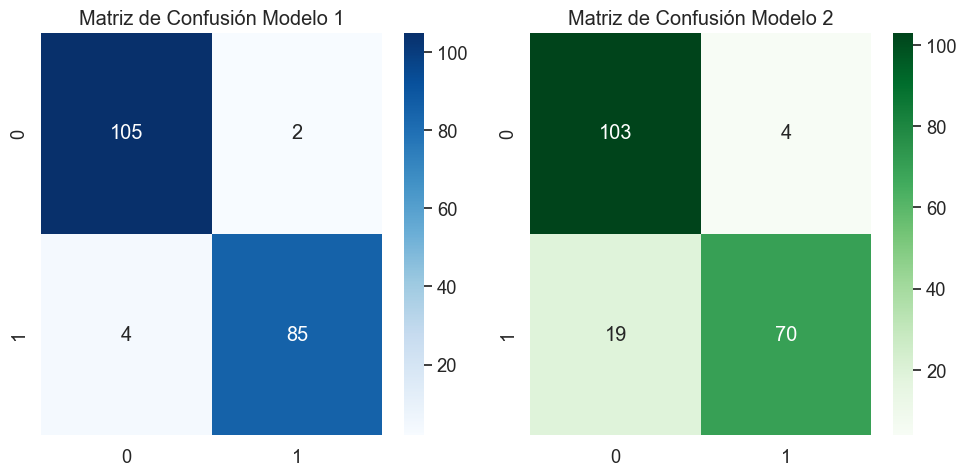

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para el Modelo del Apartado 1
cm_nn_1 = confusion_matrix(y_test, y_pred_nn_1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
sns.heatmap(cm_nn_1, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión Modelo 1')

# Matriz de confusión para el Modelo del Apartado 2
cm_nn_2 = confusion_matrix(y_test, y_pred_nn_2)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
sns.heatmap(cm_nn_2, annot=True, fmt="d", cmap="Greens")
plt.title('Matriz de Confusión Modelo 2')


plt.tight_layout()
plt.show()


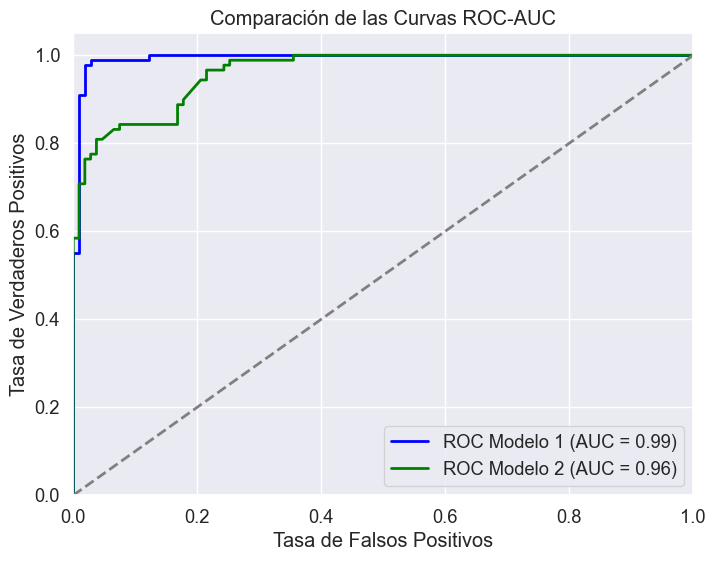

In [31]:
from sklearn.metrics import roc_curve, auc

# Curva ROC para el Modelo del Apartado 1
fpr_nn_1, tpr_nn_1, _ = roc_curve(y_test, y_pred_proba_nn_1)
roc_auc_nn_1 = auc(fpr_nn_1, tpr_nn_1)

# Curva ROC para el Modelo del Apartado 2
fpr_nn_2, tpr_nn_2, _ = roc_curve(y_test, y_pred_proba_nn_2)
roc_auc_nn_2 = auc(fpr_nn_2, tpr_nn_2)

# Gráfico de las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_1, tpr_nn_1, color='blue', lw=2, label='ROC Modelo 1 (AUC = %0.2f)' % roc_auc_nn_1)
plt.plot(fpr_nn_2, tpr_nn_2, color='green', lw=2, label='ROC Modelo 2 (AUC = %0.2f)' % roc_auc_nn_2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de las Curvas ROC-AUC')
plt.legend(loc="lower right")
plt.show()

## 4. Árboles de decisión

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer

# Definimos el modelo base
tree = DecisionTreeClassifier()

# Definimos el espacio de búsqueda de los parámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Definimos las métricas de evaluación personalizadas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    # Asegúrate de que tu problema sea de clasificación binaria para usar roc_auc
    'auc': 'roc_auc_ovr',
}

# Configuramos GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5, verbose=1)

# Ejecutamos la búsqueda
grid_search.fit(X_train_preprocessed, y_train)

# Mostramos los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación según accuracy:", grid_search.best_score_)

# Para ver los resultados para las demás métricas, necesitas acceder a cv_results_
print("Puntuaciones para todas las métricas:", grid_search.cv_results_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor puntuación según accuracy: 0.9757880124122164
Puntuaciones para todas las métricas: {'mean_fit_time': array([0.00400014, 0.00439377, 0.00239897, 0.00260143, 0.00239921,
       0.00260291, 0.00240126, 0.00259352, 0.00218687, 0.00261073,
       0.00220232, 0.00219927, 0.00259905, 0.00259914, 0.00239916,
       0.00259914, 0.0023982 , 0.00259895, 0.00259914, 0.00301218,
       0.00240412, 0.00259914, 0.0023942 , 0.00259891, 0.00219965,
       0.00259895, 0.00319881, 0.00279837, 0.00259886, 0.002601  ,
       0.00279884, 0.00380025, 0.00279469, 0.00219994, 0.00240006,
       0.00240068, 0.0023994 , 0.00241089, 0.00279927, 0.00279908,
       0.00280499, 0.00299706, 0.00300088, 0.00280967, 0.00220404,
       0.00280604, 0.00298848, 0.00300555, 0.00319934, 0.00280976,
       0.00259533, 0.00220375, 0.00280843, 0.0024

In [34]:
from sklearn.metrics import classification_report

# Reentrenamos el mejor modelo sobre todo el conjunto de datos
best_tree = DecisionTreeClassifier(**grid_search.best_params_)
best_tree.fit(X_train_preprocessed, y_train)

# Predicciones con el mejor modelo
y_pred = best_tree.predict(X_test_preprocessed)

# Cálculo manual de cada métrica
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Para AUC, necesitamos predicciones de probabilidad y considerar cada clase binariamente
y_prob = best_tree.predict_proba(X_test_preprocessed)
if y_prob.shape[1] == 2:  # Problema binario
    auc = roc_auc_score(y_test, y_prob[:, 1])
else:  # Problema multiclase
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("Resultados del mejor modelo:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

# Para obtener un informe más detallado que incluya precision además de recall y F1-score
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Resultados del mejor modelo:
Accuracy: 0.9744897959183674
Recall: 0.9738002730232069
F1 Score: 0.974247799237945
AUC: 0.9776330988133992

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.98      0.97      0.97        89

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



Pintamos mejor árbol.

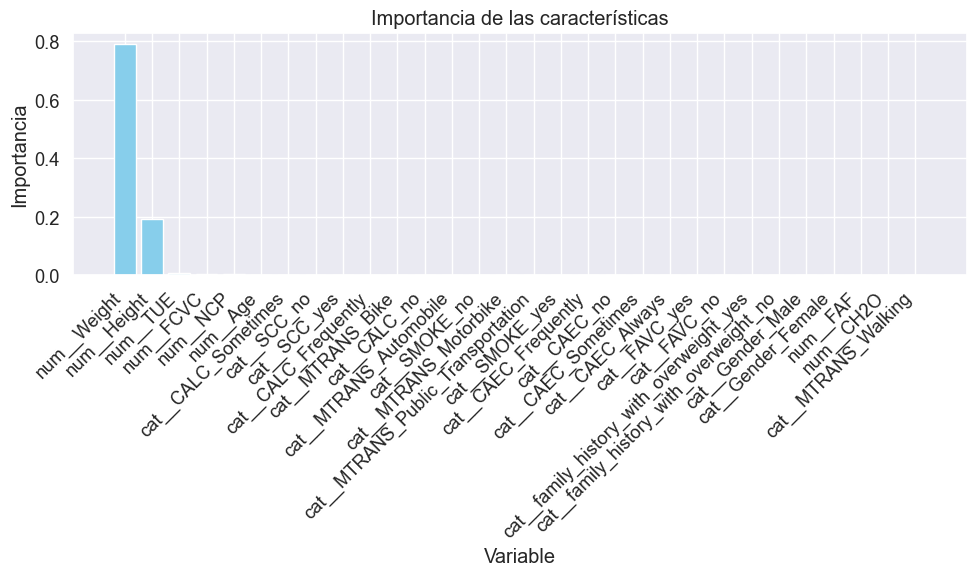

In [35]:
# Asumiendo que best_tree es tu modelo entrenado
df_importancia_c = pd.DataFrame({
    'Variable': transformed_feature_names,  # Usa tu lista de nombres de características aquí
    'Importancia': best_tree.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(df_importancia_c['Variable'], df_importancia_c['Importancia'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

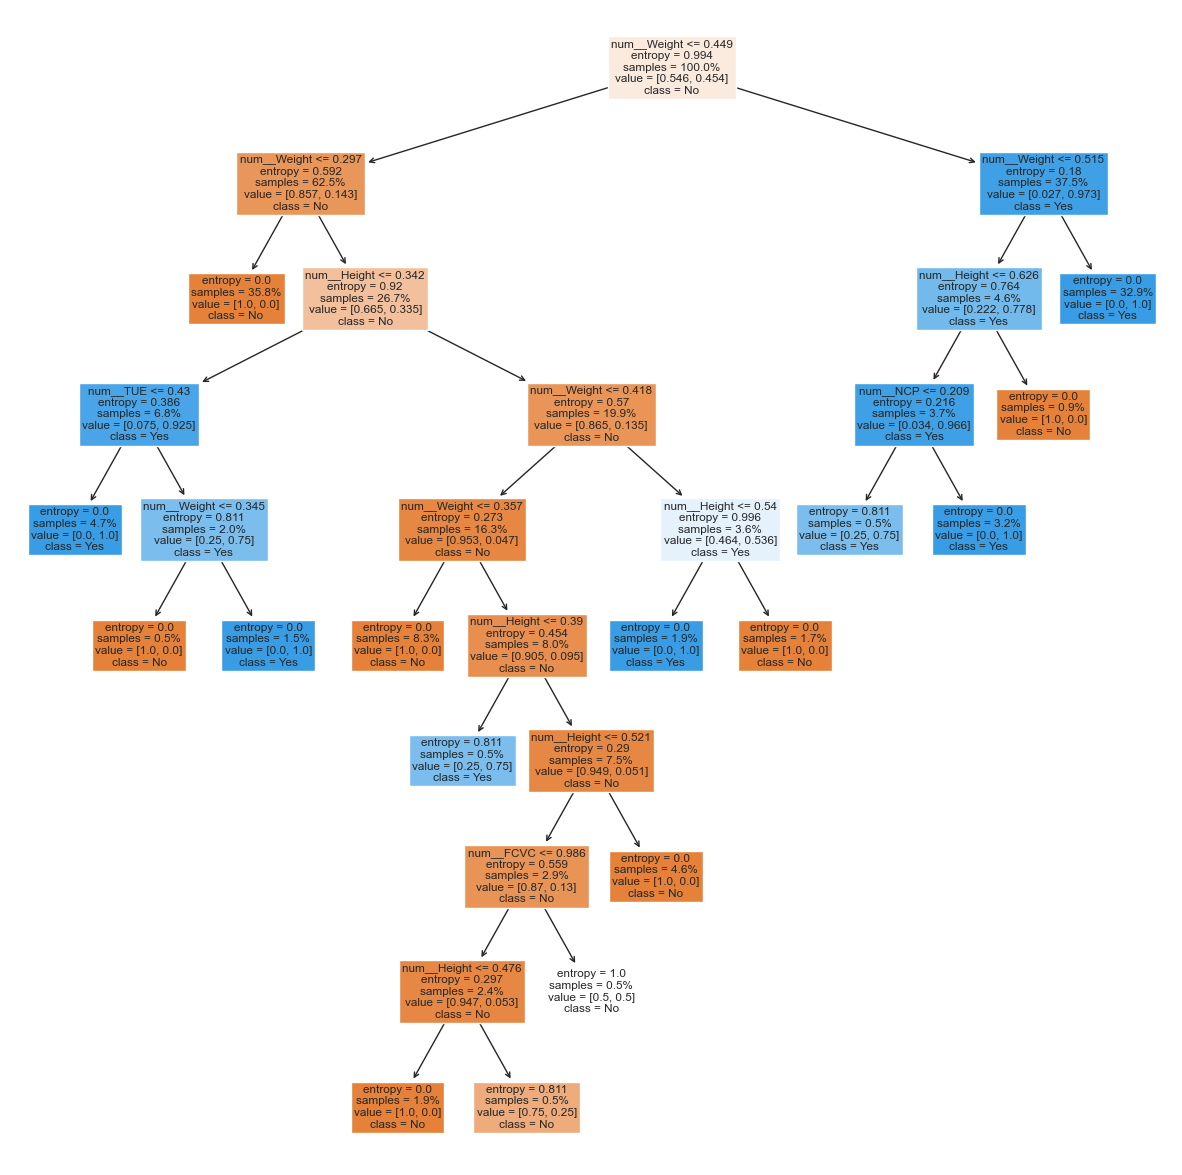

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(best_tree, feature_names=transformed_feature_names, class_names=['No', 'Yes'], filled=True,
         proportion = True)
plt.show()

In [37]:
from sklearn.tree import export_text

tree_rules = export_text(best_tree, feature_names=transformed_feature_names)
print(tree_rules)

|--- num__Weight <= 0.45
|   |--- num__Weight <= 0.30
|   |   |--- class: 0
|   |--- num__Weight >  0.30
|   |   |--- num__Height <= 0.34
|   |   |   |--- num__TUE <= 0.43
|   |   |   |   |--- class: 1
|   |   |   |--- num__TUE >  0.43
|   |   |   |   |--- num__Weight <= 0.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- num__Weight >  0.35
|   |   |   |   |   |--- class: 1
|   |   |--- num__Height >  0.34
|   |   |   |--- num__Weight <= 0.42
|   |   |   |   |--- num__Weight <= 0.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- num__Weight >  0.36
|   |   |   |   |   |--- num__Height <= 0.39
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- num__Height >  0.39
|   |   |   |   |   |   |--- num__Height <= 0.52
|   |   |   |   |   |   |   |--- num__FCVC <= 0.99
|   |   |   |   |   |   |   |   |--- num__Height <= 0.48
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- num__Height >  0.48
|   |   |   |   |   |   |   |   |   

## Bagging


In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Define the base classifier, e.g., a decision tree
from sklearn.tree import DecisionTreeClassifier
# Initialize the base classifier
base_cls = DecisionTreeClassifier()

# Initialize the BaggingClassifier with the base estimator
bagging_cls = BaggingClassifier(base_cls, n_estimators=100, random_state=4975)

# Parameters grid for GridSearch
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0]
}

# Apply GridSearch with cross-validation
grid_search = GridSearchCV(estimator=bagging_cls, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 50}
Best cross-validation score: 0.9821492732320758


In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Use the best estimator found by GridSearchCV
best_bagging_cls = grid_search.best_estimator_

# Predictions on training set
y_train_pred = best_bagging_cls.predict(X_train_preprocessed)

# Predictions on test set
y_test_pred = best_bagging_cls.predict(X_test_preprocessed)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# Detailed classification report on test data
print(classification_report(y_test, y_test_pred))


Training accuracy: 1.0
Test accuracy: 0.9744897959183674
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.98      0.97      0.97        89

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



In [24]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023993,0.004564,0.002806,0.000750,0.5,0.5,10,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.955414,0.955414,0.955414,0.936306,0.955128,0.951535,0.007616,26
1,0.107600,0.008823,0.007400,0.000491,0.5,0.5,50,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.980892,0.980892,0.968153,0.987261,0.980769,0.979593,0.006236,3
2,0.207600,0.010015,0.014001,0.000633,0.5,0.5,100,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.974522,0.993631,0.961783,0.980892,0.980769,0.978319,0.010343,6
3,0.022201,0.000400,0.002200,0.000398,0.5,0.75,10,"{'max_features': 0.5, 'max_samples': 0.75, 'n_...",0.955414,0.968153,0.936306,0.936306,0.955128,0.950261,0.012328,27
4,0.114010,0.003269,0.007603,0.000491,0.5,0.75,50,"{'max_features': 0.5, 'max_samples': 0.75, 'n_...",0.968153,0.980892,0.974522,0.955414,0.980769,0.971950,0.009510,20


In [25]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results = results.sort_values(by='rank_test_score', ascending=True).head(5)
print(sorted_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       0.112202      0.000766         0.007204        0.000397   
14       0.229998      0.015742         0.013401        0.000491   
1        0.107600      0.008823         0.007400        0.000491   
17       0.246206      0.007682         0.013195        0.000391   
11       0.201799      0.001809         0.013794        0.000397   

   param_max_features param_max_samples param_n_estimators  \
13               0.75              0.75                 50   
14               0.75              0.75                100   
1                 0.5               0.5                 50   
17               0.75               1.0                100   
11               0.75               0.5                100   

                                               params  split0_test_score  \
13  {'max_features': 0.75, 'max_samples': 0.75, 'n...           0.993631   
14  {'max_features': 0.75, 'max_samples': 0.75, 'n...           0.

In [26]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[0]
res_2 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[1]
res_3 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[2]
res_4 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[3]
res_5 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[4]

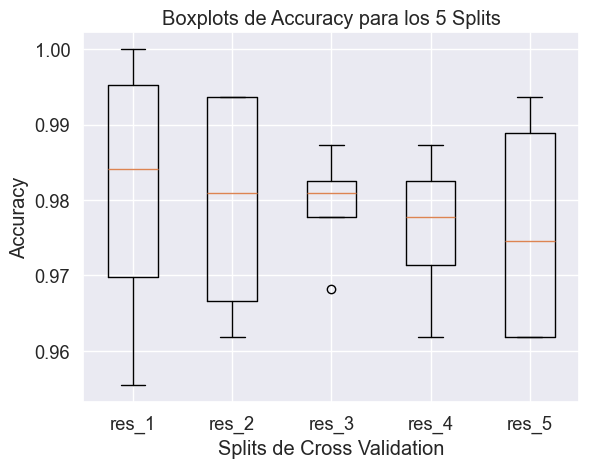

In [27]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()
# Nótese en la solución que boxplots con gran amplitud no son deseables, ya que se caracterizan por poca robustez de la solución

In [29]:
# Parámetros del mejor modelo
best_params = grid_search.best_params_
print(f"Parámetros del mejor modelo: {best_params}")

# Rendimiento del mejor modelo en el conjunto de entrenamiento
best_score = grid_search.best_score_
print(f"Puntuación del mejor modelo en entrenamiento (cross-validation): {best_score}")

# Evaluar el rendimiento en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_preprocessed)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Informe de clasificación
print(classification_report(y_test, y_pred))

# Aquí podrías añadir más detalles específicos sobre la interpretación de las métricas, 
# y cómo los parámetros del modelo impactan en el rendimiento observado.

Parámetros del mejor modelo: {'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 50}
Puntuación del mejor modelo en entrenamiento (cross-validation): 0.9821492732320758
Precisión en el conjunto de prueba: 0.9744897959183674
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.98      0.97      0.97        89

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



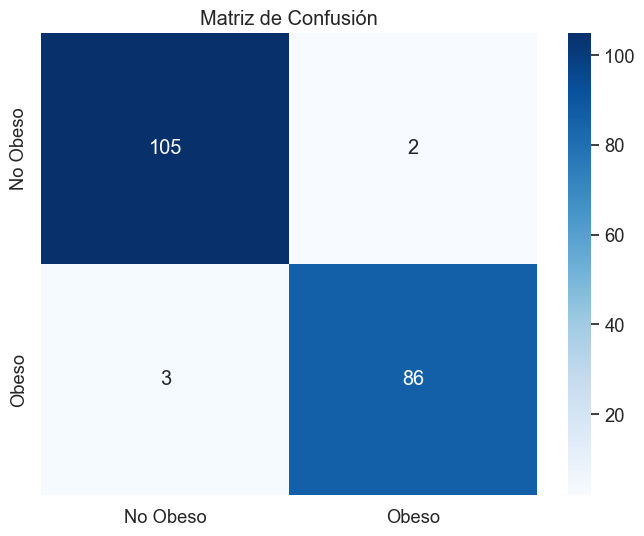

In [30]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Obeso', 'Obeso'], yticklabels=['No Obeso', 'Obeso'])
plt.title('Matriz de Confusión')
plt.show()

### Random Forest

Puntos 1,2,3

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 0.25, 0.5],
    'max_depth': [10, 20, None]
}

# Realizar la búsqueda por grid con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train)

print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 50}


4. Hacer Predicciones sobre Train y Test

In [37]:
# Predicciones sobre el conjunto de entrenamiento y de prueba
y_train_pred = grid_search.predict(X_train_preprocessed)
y_test_pred = grid_search.predict(X_test_preprocessed)

# Evaluar el modelo
from sklearn.metrics import accuracy_score

print(f"Accuracy en entrenamiento: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy en prueba: {accuracy_score(y_test, y_test_pred)}")


Accuracy en entrenamiento: 1.0
Accuracy en prueba: 0.9744897959183674


6. Mostrar Boxplots

In [38]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074005,0.005073,0.003595,0.000486,10,sqrt,50,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.980892,0.961783,0.974522,0.974522,0.974359,0.973216,0.006234,17
1,0.150801,0.015727,0.005998,0.000002,10,sqrt,100,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.974522,0.968153,0.974522,0.968153,0.967949,0.970660,0.003155,25
2,0.209002,0.001667,0.008204,0.000398,10,sqrt,150,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.974522,0.968153,0.968153,0.968153,0.974359,0.970668,0.003081,24
3,0.075812,0.002551,0.003588,0.000492,10,0.25,50,"{'max_depth': 10, 'max_features': 0.25, 'n_est...",0.980892,0.980892,0.974522,0.980892,0.980769,0.979593,0.002536,7
4,0.146594,0.001023,0.006194,0.000403,10,0.25,100,"{'max_depth': 10, 'max_features': 0.25, 'n_est...",0.974522,0.968153,0.968153,0.980892,0.980769,0.974498,0.005670,12


In [39]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results = results.sort_values(by='rank_test_score', ascending=True).head(5)
print(sorted_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6        0.083995      0.001536         0.003404        0.000484   
26       0.253813      0.004444         0.008000        0.000006   
15       0.084806      0.001474         0.003200        0.000400   
17       0.249002      0.002174         0.007999        0.000018   
24       0.084197      0.000976         0.003398        0.000498   

   param_max_depth param_max_features param_n_estimators  \
6               10                0.5                 50   
26            None                0.5                150   
15              20                0.5                 50   
17              20                0.5                150   
24            None                0.5                 50   

                                               params  split0_test_score  \
6   {'max_depth': 10, 'max_features': 0.5, 'n_esti...           0.980892   
26  {'max_depth': None, 'max_features': 0.5, 'n_es...           0.980892   
15

In [40]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[0]
res_2 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[1]
res_3 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[2]
res_4 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[3]
res_5 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[4]

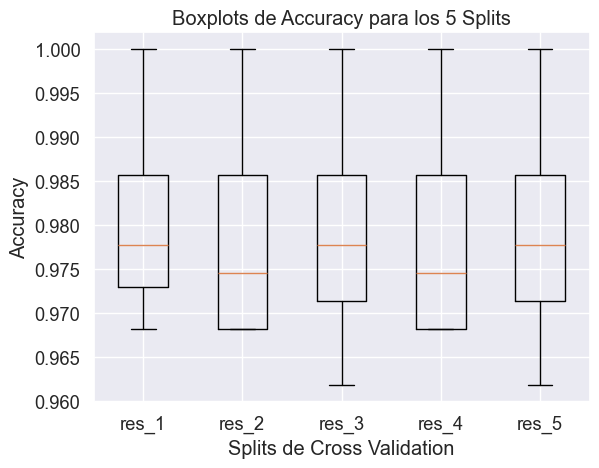

In [41]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()
# Nótese en la solución que boxplots con gran amplitud no son deseables, ya que se caracterizan por poca robustez de la solución

In [42]:
# Parámetros del mejor modelo
best_params = grid_search.best_params_
print(f"Parámetros del mejor modelo: {best_params}")

# Rendimiento del mejor modelo en el conjunto de entrenamiento
best_score = grid_search.best_score_
print(f"Puntuación del mejor modelo en entrenamiento (cross-validation): {best_score}")

# Evaluar el rendimiento en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_preprocessed)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Informe de clasificación
print(classification_report(y_test, y_pred))

# Aquí podrías añadir más detalles específicos sobre la interpretación de las métricas, 
# y cómo los parámetros del modelo impactan en el rendimiento observado.

Parámetros del mejor modelo: {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 50}
Puntuación del mejor modelo en entrenamiento (cross-validation): 0.9821492732320758
Precisión en el conjunto de prueba: 0.9744897959183674
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.98      0.97      0.97        89

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



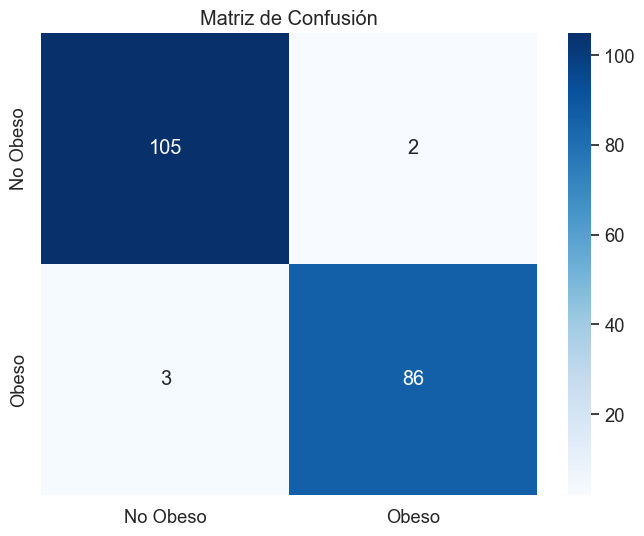

In [43]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Obeso', 'Obeso'], yticklabels=['No Obeso', 'Obeso'])
plt.title('Matriz de Confusión')
plt.show()

## Gradient Boosting y  XGBoost

### Gradient Boosting

3. Ajustar el Modelo

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Asumimos que X_train, X_test, y_train, y_test ya están definidos

# Inicializar el modelo de Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
gb.fit(X_train_preprocessed, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_test = gb.predict(X_test_preprocessed)

# Calcular la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Precisión en el conjunto de prueba: {accuracy_test}')

Precisión en el conjunto de prueba: 0.9744897959183674


3.1 Aplicar Validación Cruzada y GridSearch

In [53]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.8, 1.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV
grid_search.fit(X_train_preprocessed, y_train)

# Mejores parámetros encontrados
print(f'Mejores parámetros: {grid_search.best_params_}')


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}


4. Hacer predicciones sobre Train y Test

In [54]:
# Mejor modelo
best_gb = grid_search.best_estimator_

# Predicciones y evaluación
y_pred_train = best_gb.predict(X_train_preprocessed)
y_pred_test = best_gb.predict(X_test_preprocessed)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Precisión en entrenamiento: {accuracy_train}')
print(f'Precisión en prueba: {accuracy_test}')


Precisión en entrenamiento: 1.0
Precisión en prueba: 0.9795918367346939


5. Seleccionar las Alternativas por su Bondad de Ajuste Específica

6. Mostrar Boxplots de su Performance

In [55]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119804,0.008127,0.000999,0.000001,0.05,3,sqrt,1,2,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.955414,0.974522,0.949045,0.955414,0.974359,0.961751,0.010619,112
1,0.119405,0.020917,0.001602,0.000491,0.05,3,sqrt,1,2,100,1.0,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.961783,0.949045,0.942675,0.942675,0.967949,0.952825,0.010289,121
2,0.228595,0.004586,0.001199,0.000401,0.05,3,sqrt,1,2,200,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.974522,0.987261,0.949045,0.974522,0.980769,0.973224,0.012977,69
3,0.215405,0.001356,0.002001,0.000017,0.05,3,sqrt,1,2,200,1.0,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.980892,0.987261,0.961783,0.968153,0.980769,0.975772,0.009348,44
4,0.114208,0.003129,0.001394,0.000483,0.05,3,sqrt,1,5,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.955414,0.961783,0.949045,0.961783,0.980769,0.961759,0.010614,111


In [56]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results = results.sort_values(by='rank_test_score', ascending=True).head(5)
print(sorted_results)

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
110       0.387394      0.004623         0.002014        0.000013   
111       0.389396      0.002581         0.002002        0.000003   
106       0.393999      0.004453         0.002404        0.000489   
70        0.223005      0.001790         0.001200        0.000400   
107       0.396100      0.002085         0.002000        0.000002   

    param_learning_rate param_max_depth param_max_features  \
110                 0.1               5               sqrt   
111                 0.1               5               sqrt   
106                 0.1               5               sqrt   
70                  0.1               3               sqrt   
107                 0.1               5               sqrt   

    param_min_samples_leaf param_min_samples_split param_n_estimators  \
110                      2                       5                200   
111                      2                       5                

In [57]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[0]
res_2 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[1]
res_3 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[2]
res_4 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[3]
res_5 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[4]

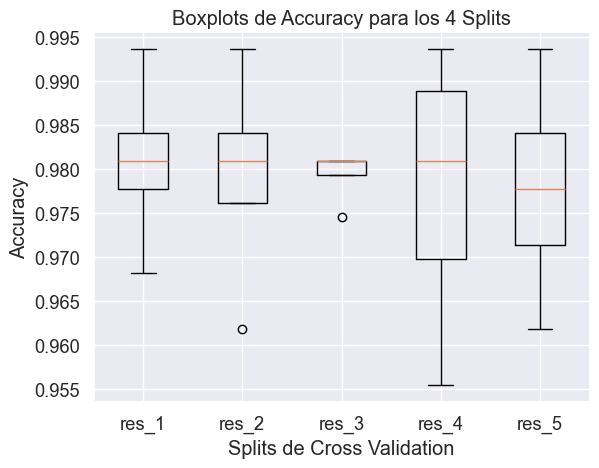

In [58]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])
plt.title('Boxplots de Accuracy para los 4 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()
# Nótese en la solución que boxplots con gran amplitud no son deseables, ya que se caracterizan por poca robustez de la solución

7.Informe de la Parametrización y Bondad de Ajuste

In [59]:
# Parámetros del mejor modelo
best_params = grid_search.best_params_
print(f"Parámetros del mejor modelo: {best_params}")

# Rendimiento del mejor modelo en el conjunto de entrenamiento
best_score = grid_search.best_score_
print(f"Puntuación del mejor modelo en entrenamiento (cross-validation): {best_score}")

# Evaluar el rendimiento en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_preprocessed)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Informe de clasificación
print(classification_report(y_test, y_pred))

# Aquí podrías añadir más detalles específicos sobre la interpretación de las métricas, 
# y cómo los parámetros del modelo impactan en el rendimiento observado.

Parámetros del mejor modelo: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Puntuación del mejor modelo en entrenamiento (cross-validation): 0.9821492732320758
Precisión en el conjunto de prueba: 0.9795918367346939
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.99      0.97      0.98        89

    accuracy                           0.98       196
   macro avg       0.98      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196



## XGBoost


In [2]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Asumimos que X_train, X_test, y_train, y_test ya están definidos
# Convertir los conjuntos de datos a DMatrix, un formato de datos optimizado que XGBoost utiliza para mayor eficiencia y rendimiento
dtrain = xgb.DMatrix(X_train_preprocessed, label=y_train)
dtest = xgb.DMatrix(X_test_preprocessed, label=y_test)

# Definir los parámetros para el modelo XGBoost
params = {
    'objective': 'binary:logistic', # Cambiar según sea necesario para problemas multiclase o de regresión
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Entrenar el modelo
model = xgb.train(params, dtrain, num_boost_round=100)

# Realizar predicciones
preds = model.predict(dtest)
predictions = [round(value) for value in preds]

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print("Precisión en el conjunto de prueba: %.2f%%" % (accuracy * 100.0))


NameError: name 'X_train_preprocessed' is not defined

3.1 Aplicar Validación Cruzada y GridSearch

In [3]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el modelo
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'colsample_bytree': [0.3, 0.7]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV
grid_search.fit(X_train_preprocessed, y_train)

# Mejores parámetros encontrados
print(f'Mejores parámetros: {grid_search.best_params_}')


NameError: name 'X_train_preprocessed' is not defined

4. Hacer Predicciones sobre Train y Test

In [1]:
# Mejor modelo
best_xgb = grid_search.best_estimator_

# Predicciones y evaluación
y_pred_train = best_xgb.predict(X_train_preprocessed)
y_pred_test = best_xgb.predict(X_test_preprocessed)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Precisión en entrenamiento: {accuracy_train}')
print(f'Precisión en prueba: {accuracy_test}')


NameError: name 'grid_search' is not defined

5. Mostrar Boxplots de su Performance

In [63]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0352,0.006911,0.0026,4.895318e-04,0.3,0.01,3,100,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",0.917197,0.929936,0.910828,0.929936,0.923077,0.922195,0.007414,16
1,0.0526,0.002058,0.0020,6.641573e-07,0.3,0.01,3,200,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",0.968153,0.974522,0.942675,0.923567,0.942308,0.950245,0.018666,14
2,0.0412,0.000980,0.0020,8.176054e-07,0.3,0.01,5,100,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",0.955414,0.949045,0.942675,0.942675,0.935897,0.945141,0.006609,15
3,0.0748,0.003059,0.0022,4.009012e-04,0.3,0.01,5,200,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",0.974522,0.968153,0.955414,0.955414,0.948718,0.960444,0.009442,13
4,0.0432,0.027402,0.0022,3.998525e-04,0.3,0.1,3,100,"{'colsample_bytree': 0.3, 'learning_rate': 0.1...",0.961783,0.974522,0.955414,0.961783,0.961538,0.963008,0.006251,12


In [64]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results = results.sort_values(by='rank_test_score', ascending=True).head(5)
print(sorted_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12       0.033799      0.000748         0.002001    6.143617e-07   
14       0.042200      0.001599         0.002200    4.001624e-04   
13       0.059800      0.002317         0.002000    5.722046e-07   
15       0.075601      0.016305         0.002000    6.641573e-07   
7        0.068000      0.001898         0.002200    3.988035e-04   

   param_colsample_bytree param_learning_rate param_max_depth  \
12                    0.7                 0.1               3   
14                    0.7                 0.1               5   
13                    0.7                 0.1               3   
15                    0.7                 0.1               5   
7                     0.3                 0.1               5   

   param_n_estimators                                             params  \
12                100  {'colsample_bytree': 0.7, 'learning_rate': 0.1...   
14                100  {'colsample_bytree': 0.7,

In [65]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[0]
res_2 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[1]
res_3 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[2]
res_4 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[3]
res_5 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[4]

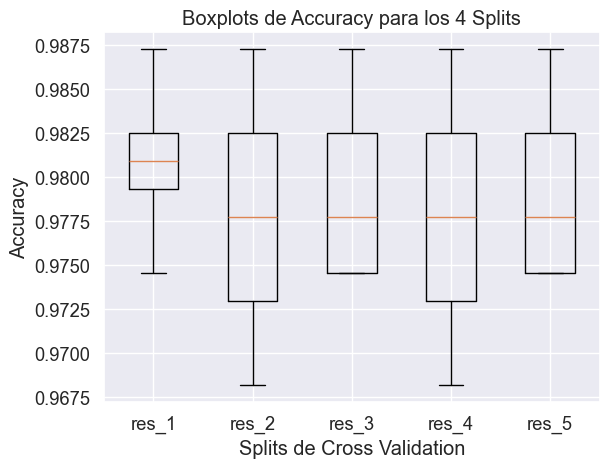

In [66]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()
# Nótese en la solución que boxplots con gran amplitud no son deseables, ya que se caracterizan por poca robustez de la solución

7.Informe de la Parametrización y Bondad de Ajuste

In [67]:
# Parámetros del mejor modelo
best_params = grid_search.best_params_
print(f"Parámetros del mejor modelo: {best_params}")

# Rendimiento del mejor modelo en el conjunto de entrenamiento
best_score = grid_search.best_score_
print(f"Puntuación del mejor modelo en entrenamiento (cross-validation): {best_score}")

# Evaluar el rendimiento en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_preprocessed)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Informe de clasificación
print(classification_report(y_test, y_pred))

# Aquí podrías añadir más detalles específicos sobre la interpretación de las métricas, 
# y cómo los parámetros del modelo impactan en el rendimiento observado.

Parámetros del mejor modelo: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Puntuación del mejor modelo en entrenamiento (cross-validation): 0.9834313245141271
Precisión en el conjunto de prueba: 0.9846938775510204
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.99      0.98      0.98        89

    accuracy                           0.98       196
   macro avg       0.99      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196



## SVM

Usamos el preprocesamiento de siempre con el MinMax Scaler y el OneHot encoder pues SVM no funciona bien ni con missing ni con valores no estandarizados
Puede manejar variables categóricas, pero se RECOMIENDA manejar dummies

1. GridSearch with two kernels

In [21]:
# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Pipeline con preprocesador y SVC
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(random_state=4975))
])

# Espacio de parámetros para GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Valores comunes para C
    'svc__kernel': ['linear', 'rbf'],  # Kernels a probar
    'svc__gamma': [0.001, 0.0001, 'scale', 'auto']  # Solo relevante para kernel 'rbf'
}

# Aplicar GridSearchCV con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=10)
grid_search.fit(X_train, y_train)  # Asegúrate de haber definido X_train y y_train

# Mejores parámetros y mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START svc__C=0.1, svc__gamma=0.001, svc__kernel=linear...........
[CV 1/5; 1/32] END svc__C=0.1, svc__gamma=0.001, svc__kernel=linear;, score=0.981 total time=   0.0s
[CV 2/5; 1/32] START svc__C=0.1, svc__gamma=0.001, svc__kernel=linear...........
[CV 2/5; 1/32] END svc__C=0.1, svc__gamma=0.001, svc__kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5; 1/32] START svc__C=0.1, svc__gamma=0.001, svc__kernel=linear...........
[CV 3/5; 1/32] END svc__C=0.1, svc__gamma=0.001, svc__kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5; 1/32] START svc__C=0.1, svc__gamma=0.001, svc__kernel=linear...........
[CV 4/5; 1/32] END svc__C=0.1, svc__gamma=0.001, svc__kernel=linear;, score=0.981 total time=   0.0s
[CV 5/5; 1/32] START svc__C=0.1, svc__gamma=0.001, svc__kernel=linear...........
[CV 5/5; 1/32] END svc__C=0.1, svc__gamma=0.001, svc__kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5; 2/32] START svc__C=

2. Metrics in test


In [22]:
# Mejor modelo
best_svm = grid_search.best_estimator_

# Predicciones y evaluación
y_pred_train = best_svm.predict(X_train)
y_pred_test = best_svm.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Precisión en entrenamiento: {accuracy_train}')
print(f'Precisión en prueba: {accuracy_test}')


Precisión en entrenamiento: 0.9936224489795918
Precisión en prueba: 0.9795918367346939


5. Mostrar Boxplots de su Performance

In [23]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017372,0.004431,0.006801,0.001167,0.1,0.001,linear,"{'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...",0.980892,0.980892,0.974522,0.980892,0.987179,0.980875,0.004003,13
1,0.024995,0.000901,0.013800,0.000748,0.1,0.001,rbf,"{'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...",0.541401,0.547771,0.547771,0.547771,0.544872,0.545917,0.002522,30
2,0.013799,0.000399,0.005400,0.000489,0.1,0.0001,linear,"{'svc__C': 0.1, 'svc__gamma': 0.0001, 'svc__ke...",0.980892,0.980892,0.974522,0.980892,0.987179,0.980875,0.004003,13
3,0.025215,0.001467,0.012996,0.000634,0.1,0.0001,rbf,"{'svc__C': 0.1, 'svc__gamma': 0.0001, 'svc__ke...",0.541401,0.547771,0.547771,0.547771,0.544872,0.545917,0.002522,30
4,0.013600,0.000491,0.005794,0.000738,0.1,scale,linear,"{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k...",0.980892,0.980892,0.974522,0.980892,0.987179,0.980875,0.004003,13


In [24]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results = results.sort_values(by='rank_test_score', ascending=True).head(5)
print(sorted_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
28       0.056612      0.042418         0.005388        0.000475          100   
26       0.053998      0.041680         0.005195        0.000389          100   
30       0.057802      0.042275         0.004999        0.000002          100   
24       0.054597      0.042170         0.004999        0.000634          100   
18       0.016007      0.001409         0.005006        0.000014           10   

   param_svc__gamma param_svc__kernel  \
28            scale            linear   
26           0.0001            linear   
30             auto            linear   
24            0.001            linear   
18           0.0001            linear   

                                               params  split0_test_score  \
28  {'svc__C': 100, 'svc__gamma': 'scale', 'svc__k...           0.980892   
26  {'svc__C': 100, 'svc__gamma': 0.0001, 'svc__ke...           0.980892   
30  {'svc__C': 100, 'svc__gamma': 'aut

In [25]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[0]
res_2 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[1]
res_3 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[2]
res_4 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[3]
res_5 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[4]

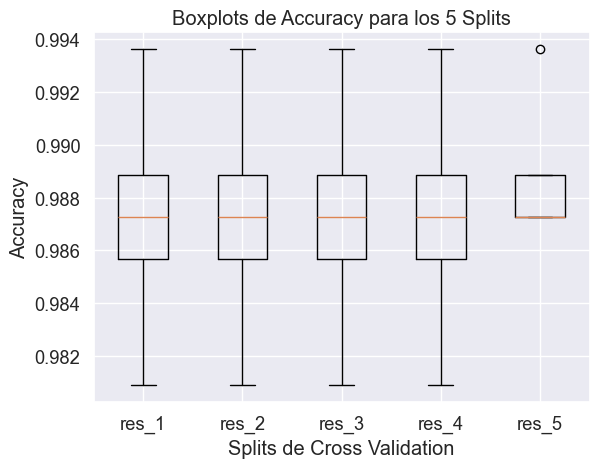

In [26]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()
# Nótese en la solución que boxplots con gran amplitud no son deseables, ya que se caracterizan por poca robustez de la solución

6. Conclusiones


In [27]:
# Parámetros del mejor modelo
best_params = grid_search.best_params_
print(f"Parámetros del mejor modelo: {best_params}")

# Rendimiento del mejor modelo en el conjunto de entrenamiento
best_score = grid_search.best_score_
print(f"Puntuación del mejor modelo en entrenamiento (cross-validation): {best_score}")

# Evaluar el rendimiento en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Informe de clasificación
print(classification_report(y_test, y_pred))

# Aquí podrías añadir más detalles específicos sobre la interpretación de las métricas, 
# y cómo los parámetros del modelo impactan en el rendimiento observado.

Parámetros del mejor modelo: {'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
Puntuación del mejor modelo en entrenamiento (cross-validation): 0.9859627633512984
Precisión en el conjunto de prueba: 0.9795918367346939
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.98      0.98      0.98        89

    accuracy                           0.98       196
   macro avg       0.98      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196



## Bagging


In [27]:
# Preprocesador para variables numéricas y categóricas (ajustar según tus datos)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Ajustar nombres de columnas numéricas
        ('cat', OneHotEncoder(), categorical_columns)   # Ajustar nombres de columnas categóricas
    ]
)

# Initialize the BaggingClassifier with the base estimator
bgclassifier = BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=4975)

# Pipeline con preprocesador y BaggingClassifier utilizando SVC como clasificador base
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('bagging', bgclassifier)
])

# Definir la cuadrícula de parámetros para GridSearchCV
param_grid = {
    'bagging__n_estimators': [10, 20, 50],  # Número de estimadores en el ensamblado
    'bagging__estimator__C': [0.1, 1, 10],  # Parámetro de regularización para SVC
    'bagging__estimator__kernel': ['linear', 'rbf'],  # Kernel para SVC
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=10)
grid_search.fit(X_train, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
y_pred = grid_search.predict(X_test)
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__n_estimators=10
[CV 1/5; 1/18] END bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__n_estimators=10;, score=0.981 total time=   0.0s
[CV 2/5; 1/18] START bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__n_estimators=10
[CV 2/5; 1/18] END bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__n_estimators=10;, score=0.987 total time=   0.0s
[CV 3/5; 1/18] START bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__n_estimators=10
[CV 3/5; 1/18] END bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__n_estimators=10;, score=0.981 total time=   0.0s
[CV 4/5; 1/18] START bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__n_estimators=10
[CV 4/5; 1/18] END bagging__estimator__C=0.1, bagging__estimator__kernel=linear, bagging__

In [28]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bagging__estimator__C,param_bagging__estimator__kernel,param_bagging__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050595,0.004319,0.012410,0.001020,0.1,linear,10,"{'bagging__estimator__C': 0.1, 'bagging__estim...",0.980892,0.987261,0.980892,0.980892,0.974359,0.980859,0.004080,8
1,0.123591,0.060294,0.025201,0.004443,0.1,linear,20,"{'bagging__estimator__C': 0.1, 'bagging__estim...",0.980892,0.980892,0.974522,0.987261,0.967949,0.978303,0.006560,9
2,0.217104,0.008200,0.044813,0.002921,0.1,linear,50,"{'bagging__estimator__C': 0.1, 'bagging__estim...",0.980892,0.980892,0.980892,0.987261,0.987179,0.983423,0.003100,6
3,0.077599,0.002332,0.047801,0.003970,0.1,rbf,10,"{'bagging__estimator__C': 0.1, 'bagging__estim...",0.853503,0.904459,0.898089,0.898089,0.878205,0.886469,0.018701,18
4,0.147609,0.006349,0.086449,0.004632,0.1,rbf,20,"{'bagging__estimator__C': 0.1, 'bagging__estim...",0.866242,0.904459,0.898089,0.904459,0.884615,0.891573,0.014592,16


In [29]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results = results.sort_values(by='rank_test_score', ascending=True).head(5)
print(sorted_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14       0.315400      0.027868         0.022610        0.000800   
13       0.128993      0.010117         0.012407        0.000497   
12       0.069596      0.010588         0.008797        0.000398   
8        0.197610      0.004020         0.028187        0.000749   
7        0.084808      0.001841         0.013593        0.000486   

   param_bagging__estimator__C param_bagging__estimator__kernel  \
14                          10                           linear   
13                          10                           linear   
12                          10                           linear   
8                            1                           linear   
7                            1                           linear   

   param_bagging__n_estimators  \
14                          50   
13                          20   
12                          10   
8                           50   
7                 

In [30]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[0]
res_2 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[1]
res_3 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[2]
res_4 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[3]
res_5 = sorted_results[['split0_test_score', 'split1_test_score','split2_test_score', 'split3_test_score']].iloc[4]

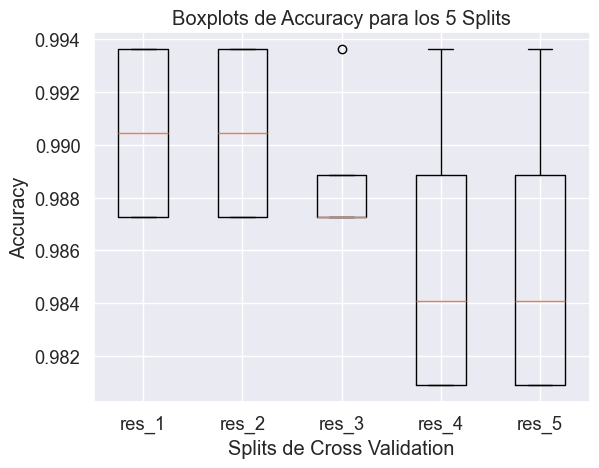

In [32]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()

## Stacking

In [45]:
from vecstack import stacking

# Modelos base para el StackingClassifier
base_models = [
    LogisticRegression(random_state=4975),
    SVC(random_state=4975, probability=True),
    RandomForestClassifier(random_state=4975)
]

#entrenamos los modelos base
for model in base_models:
    model.fit(X_train_preprocessed, y_train)


# Generar las características de stacking
S_train, S_test = stacking(base_models, X_train_preprocessed, y_train, X_test_preprocessed, 
                        n_folds=4, 
                        stratified=True, shuffle=True, 
                        random_state=4975, verbose=2)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]
    fold  0:  [0.06122449]
    fold  1:  [0.06122449]
    fold  2:  [0.06632653]
    fold  3:  [0.07142857]
    ----
    MEAN:     [0.06505102] + [0.00423039]
    FULL:     [0.06505102]

model  1:     [SVC]
    fold  0:  [0.11224490]
    fold  1:  [0.07142857]
    fold  2:  [0.10204082]
    fold  3:  [0.10204082]
    ----
    MEAN:     [0.09693878] + [0.01530612]
    FULL:     [0.09693878]

model  2:     [RandomForestClassifier]
    fold  0:  [0.02551020]
    fold  1:  [0.01530612]
    fold  2:  [0.02551020]
    fold  3:  [0.02551020]
    ----
    MEAN:     [0.02295918] + [0.00441850]
    FULL:     [0.02295918]



In [46]:
# Definir y entrenar el modelo de nivel superior (por ejemplo, una regresión logística)
model_superior = LogisticRegression()
model_superior.fit(S_train, y_train)

# Hacer predicciones sobre el conjunto de prueba utilizando el modelo de nivel superior
predicciones_test = model_superior.predict(S_test)

# Calcular la precisión en el conjunto de prueba
precision = accuracy_score(y_test, predicciones_test)
print("Precisión en el conjunto de prueba:", precision)

Precisión en el conjunto de prueba: 0.9693877551020408
